# Bar Plot

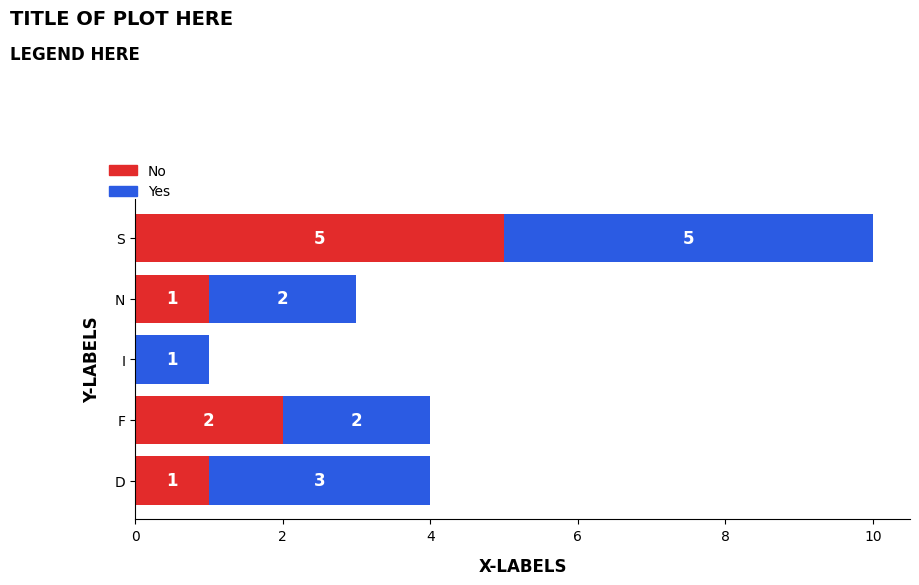

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv("csv_files/bar_assignment.csv")

# Ensure columns are correctly formatted
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Create a cross-tabulation
data = pd.crosstab(df['LABEL'], df['COUNT'])
data = data.sort_index()

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Define colors
colors = {"No": "#E32B2B", "Yes": "#2B5BE3"}

# Plot bars
bars_no = ax.barh(data.index, data['No'], color=colors["No"], label="No")
bars_yes = ax.barh(data.index, data['Yes'], left=data['No'], color=colors["Yes"], label="Yes")

# Add labels inside the bars
for bar, value in zip(bars_no, data['No']):
    if value > 0:
        ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2, str(value), 
                va='center', ha='center', color='white', fontweight='bold', fontsize=12)

for bar, value, left in zip(bars_yes, data['Yes'], data['No']):
    if value > 0:
        ax.text(left + value / 2, bar.get_y() + bar.get_height()/2, str(value), 
                va='center', ha='center', color='white', fontweight='bold', fontsize=12)

# Style the title and legend placement
plt.figtext(0, 1.1, "TITLE OF PLOT HERE", fontsize=14, fontweight='bold', ha='left')
plt.figtext(0, 1.03, "LEGEND HERE", fontsize=12, fontweight='bold', ha='left')

# Custom legend using patches
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=colors['No'], label='No'),
                  plt.Rectangle((0, 0), 1, 1, color=colors['Yes'], label='Yes')]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(-0.05, 1.15), frameon=False)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels
ax.set_xlabel("X-LABELS", fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel("Y-LABELS", fontsize=12, fontweight='bold', labelpad=10)

# Adjust layout so title & legend are above the plot
plt.subplots_adjust(top=0.75)

# Show plot
plt.show()


# Sankey Plot

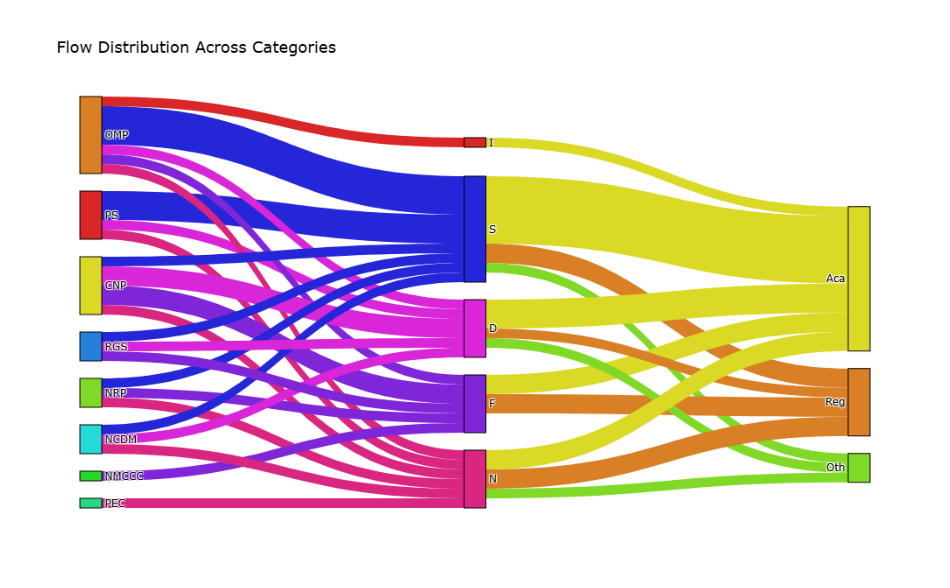

In [82]:
import pandas as pd
import plotly.graph_objects as go
from PIL import Image
IMAGE_PATH = './images/'
# Load the dataset
df = pd.read_csv("csv_files/sankey_assignment.csv")

# Define categories
sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
middles = ['S', 'F', 'D', 'N', 'I']
targets = ['Reg', 'Aca', 'Oth']

# Create node dictionary
nodes = {name: i for i, name in enumerate(sources + middles + targets)}

# Store connections
links = []

# Source → Middle connections
for src in sources:
    for mid in middles:
        value = df[df["LABEL"] == mid][src].values[0]
        if value > 0:
            links.append((src, mid, value))

# Middle → Target connections
for mid in middles:
    for tgt in targets:
        value = df[df["LABEL"] == mid][tgt].values[0]
        if value > 0:
            links.append((mid, tgt, value))

# Extract indices and values
source_indices = [nodes[src] for src, tgt, val in links]
target_indices = [nodes[tgt] for src, tgt, val in links]
values = [val for src, tgt, val in links]

# Generate color map dynamically
colors = {name: f"hsl({(i*30) % 360}, 70%, 50%)" for i, name in enumerate(nodes)}

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=25,
        line=dict(color="black", width=1),
        label=list(nodes.keys()),
        color=[colors[name] for name in nodes.keys()]
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=[colors[tgt] for src, tgt, val in links]  # Color links based on the target node
    )
))

# Update layout
fig.update_layout(
    title_text="Flow Distribution Across Categories",
    font=dict(family="Verdana", size=12, color="black"),
    title_font=dict(size=18, family="Verdana", color="black"),
    height=650,
    paper_bgcolor="white",
)

# Show the figure
fig.show()
img_sankey = Image.open(IMAGE_PATH + "snakey_graph.png")
plt.figure(figsize=(12, 8)) 
# Display the image inline using matplotlib
plt.imshow(img_sankey)
plt.axis('off')  # Hide axes for a clean view
plt.show()

# Network Plot

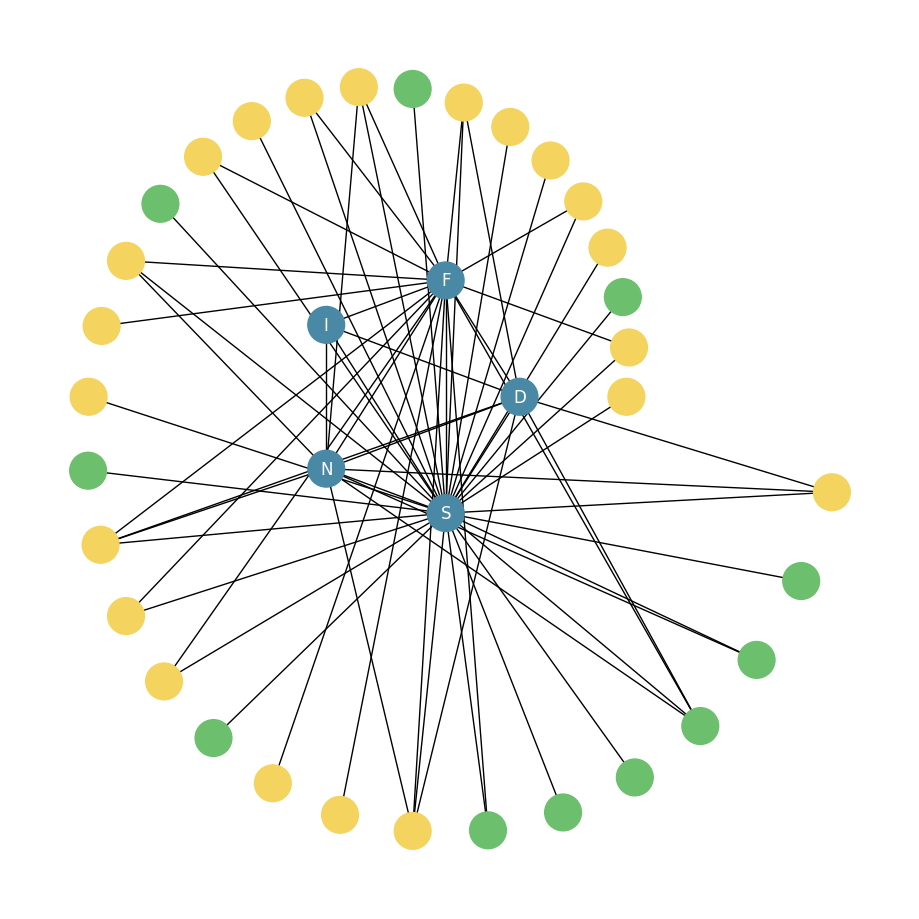

In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV file
df = pd.read_csv("csv_files/networks_assignment.to_csv")

# Set 'LABELS' as index to access rows properly
df.set_index('LABELS', inplace=True)

# Extract nodes
externalNodes = df.columns.to_numpy()  # Column names (external nodes)
interiorNodes = df.index.to_numpy()    # Row names (interior nodes)

# Create graph
G = nx.Graph()
G.add_nodes_from(interiorNodes)
G.add_nodes_from(externalNodes)

# Add edges between nodes where value is nonzero
for row in interiorNodes:
    for col in externalNodes:
        if df.at[row, col] != 0:
            G.add_edge(row, col, weight=df.at[row, col])

# Define colors
node_colors = []
for node in G.nodes():
    if node in interiorNodes:
        node_colors.append("#4A89A6")  # Sky blue
    elif node in ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']:
        node_colors.append("#6CBF6C")  # Green
    else:
        node_colors.append("#F4D35E")  # Yellow

# Define positions for nodes
theta = np.linspace(0, 2 * np.pi, 5, endpoint=False)
pentagram_positions = {node: (np.cos(t), np.sin(t)) for node, t in zip(interiorNodes, theta)}

externalNodes = externalNodes[~np.isin(externalNodes, interiorNodes)]  # Filter external nodes
externalNodeCount = len(externalNodes)
outer_theta = np.linspace(0, 2 * np.pi, externalNodeCount, endpoint=False)
radius = np.linspace(2, 4, externalNodeCount)  # Variable radius for distribution
outer_positions = {node: (r * np.cos(t), r * np.sin(t)) for node, r, t in zip(externalNodes, radius, outer_theta)}

pos = {**pentagram_positions, **outer_positions}
labels = {node: node for node in interiorNodes}

# Draw graph
plt.figure(figsize=(9, 9))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color=node_colors, edge_color="black", font_color="white")
plt.show()


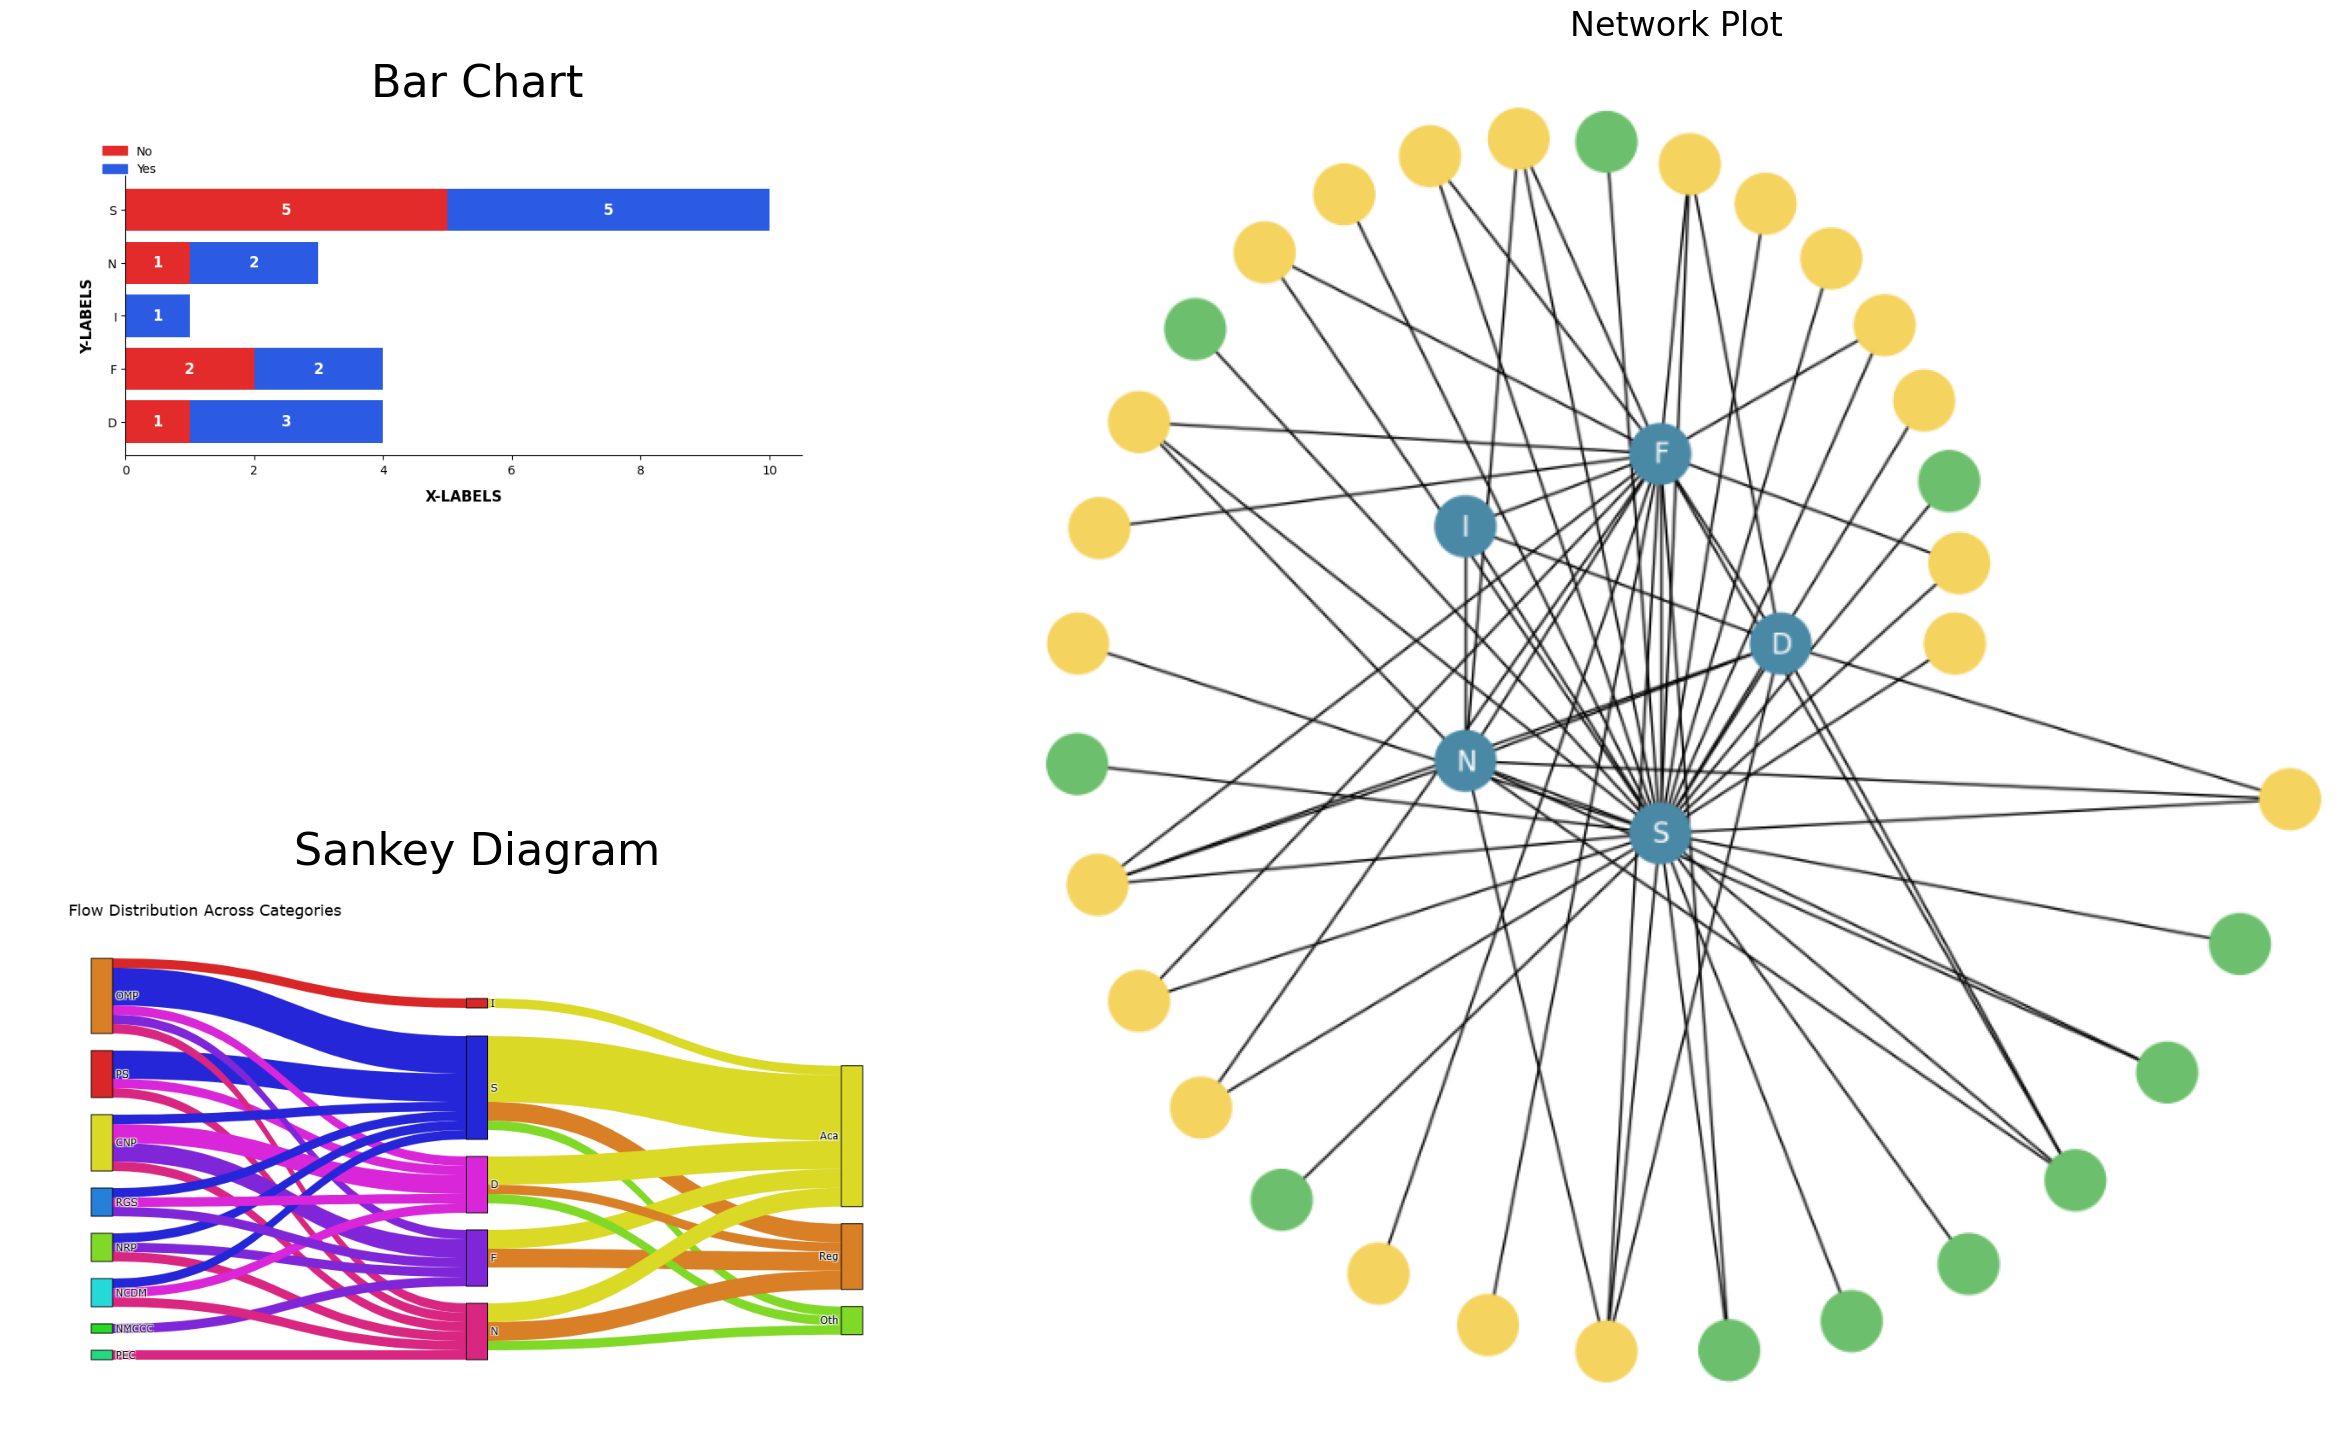

In [87]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image

IMAGE_PATH = './images/'

# Load images from the 'images' folder
img_bar = Image.open(IMAGE_PATH + "bar_graph.png") 
img_sankey = Image.open(IMAGE_PATH + "snakey_graph.png") 
img_network = Image.open(IMAGE_PATH + "network_graph.png")  

# Create the summary figure
fig_summary = plt.figure(figsize=(30, 18))  
gs = GridSpec(2, 3, figure=fig_summary, width_ratios=[6, 6, 2], height_ratios=[4, 4])
gs.update(wspace=0.1, hspace=0.5) 

# Add subplots
ax1 = fig_summary.add_subplot(gs[0, 0])  # Bar Chart
ax2 = fig_summary.add_subplot(gs[1, 0])  # Sankey
ax3 = fig_summary.add_subplot(gs[:, 1:])  # Network Plot 

# Display images in the subplots
ax1.imshow(img_bar)
ax1.axis("off")
ax1.set_title("Bar Chart", fontsize=32)

ax2.imshow(img_sankey)
ax2.axis("off")
ax2.set_title("Sankey Diagram", fontsize=32)

ax3.imshow(img_network)
ax3.axis("off")
ax3.set_title("Network Plot", fontsize=24)

# Show summary layout
plt.show()